In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [ ]:
dataset = '/content/keypoint2.csv'
model_save_path = '/content/keypoint_classifier2.keras'
tflite_save_path = '/content/keypoint_classifier2.tflite'

In [ ]:
NUM_CLASSES = 29

In [ ]:
import pandas as pd

try:
    df = pd.read_csv(dataset, header=None)
    # Drop rows with fewer than 43 columns (1 class column + 42 keypoint columns)
    df = df[df.count(axis=1) >= 43]
    X_dataset = df.iloc[:, 1:].values.astype('float32')
except Exception as e:
    print(f"Error loading dataset: {e}")
    X_dataset = None # Set X_dataset to None if loading fails

In [ ]:
y_dataset = df.iloc[:, 0].values.astype('int32')

In [ ]:
if X_dataset is not None and y_dataset is not None:
    X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
else:
    print("Dataset loading failed. Cannot perform train/test split.")

In [ ]:
input_dim = 21 * 2

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((input_dim,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_32 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,797 (65.61 KB)

 Trainable params: 16,797 (65.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
841/841 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3484 - loss: 2.1008
Epoch 1: saving model to /content/keypoint_classifier2.keras
841/841 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3486 - loss: 2.1002 - val_accuracy: 0.8392 - val_loss: 0.6174
Epoch 2/1000
833/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 1.0188
Epoch 2: saving model to /content/keypoint_classifier2.keras
841/841 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6572 - loss: 1.0182 - val_accuracy: 0.8997 - val_loss: 0.4704
Epoch 3/1000
834/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.8346
Epoch 3: saving model to /content/keypoint_classifier2.keras
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7214 - loss: 0.8343 - val_accuracy: 0.9158 - val_loss: 0.3818
Epoch 4/1000
837/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7551 - loss: 0.7359
Epoch 4: saving model to /content/keypoint_classifier2.keras
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.6322


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
[1.3570929e-03 1.7686713e-07 1.2250417e-06 5.2413448e-05 5.6390734e-03
 3.9613224e-06 2.2846636e-05 1.3843836e-06 3.0898493e-02 3.3182112e-04
 2.0179781e-05 1.6732116e-05 1.1994625e-03 6.5005254e-03 1.6126598e-04
 2.0859080e-08 5.3046909e-09 7.2816876e-04 8.7787747e-02 8.2738055e-03
 4.9141952e-05 1.6099476e-08 4.0458563e-08 8.5409963e-01 1.5587147e-04
 2.2263781e-03 1.8366769e-07 3.0919651e-41 4.7218709e-04]
23


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


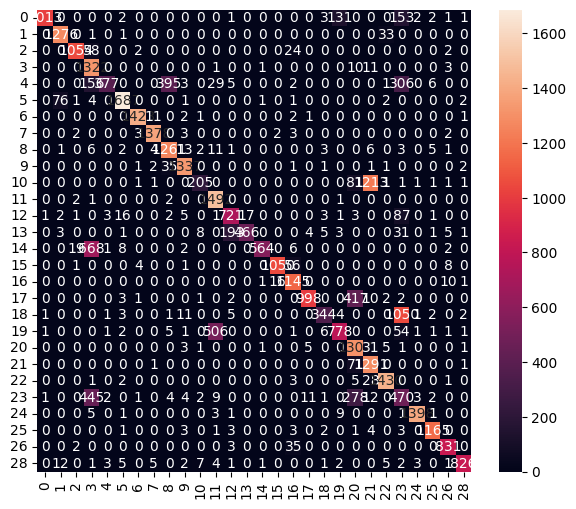

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1309
           1       0.93      0.97      0.95      1311
           2       0.97      0.92      0.95      1140
           3       0.50      0.98      0.66      1348
           4       0.97      0.29      0.45      1280
           5       0.97      0.95      0.96      1775
           6       0.99      0.99      0.99      1441
           7       0.98      0.99      0.99      1393
           8       0.74      0.96      0.83      1319
           9       0.96      0.97      0.96      1381
          10       0.90      0.14      0.24      1507
          11       0.73      1.00      0.84      1498
          12       0.77      0.83      0.80       864
          13       0.96      0.65      0.77       721
          14       0.99      0.44      0.61      1270
          15       0.98      0.94      0.96      1120
          16       0.89      0.98      0.93      1173
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# # Transform model (quantization)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmphzyqbae9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_15')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  140156657850064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657845456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657859472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657848720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657859088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628560: TensorSpec(shape=(), dtype=tf.resource, name=None)


25640

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = []  # Không dùng quantization
tflite_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_model)


Saved artifact at '/tmp/tmpxclxqlnx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_15')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  140156657850064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657845456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657859472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657848720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140156657859088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140154517628560: TensorSpec(shape=(), dtype=tf.resource, name=None)


69708

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 63.7 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3822537e-03 2.5253394e-07 1.8295887e-06 1.0428054e-04 5.6303008e-03
 5.2618057e-06 2.5418858e-05 1.7512820e-06 3.5187624e-02 3.9608506e-04
 2.4739007e-05 2.2375996e-05 1.0644612e-03 6.1871679e-03 2.1284493e-04
 3.0559999e-08 7.8106597e-09 9.2581072e-04 8.0762029e-02 7.5576277e-03
 7.4591568e-05 2.5569415e-08 5.2932524e-08 8.5692257e-01 1.5624177e-04
 2.8530620e-03 2.2759210e-07 0.0000000e+00 5.0111732e-04]
23
